# Exercise: Clustering Algorithms with Scikit Learn
<img src="../IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [3]:
datasets

<module 'sklearn.datasets' from '/home/muha/anaconda3/lib/python3.6/site-packages/sklearn/datasets/__init__.py'>

# Ex.1: OrgSolution

In [4]:
A

array([[ 0.42717711, -0.18779409],
       [-0.67640274,  0.76209216],
       [ 0.40145403, -0.9424084 ],
       ...,
       [-0.98870072,  0.23983028],
       [ 0.1890287 , -0.42669014],
       [-0.00723755,  0.40562824]])

In [5]:
len(A)

1500

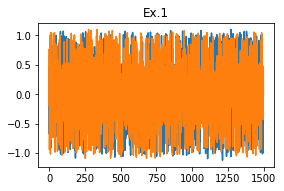

In [6]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("Ex.1")

plt.plot(A)

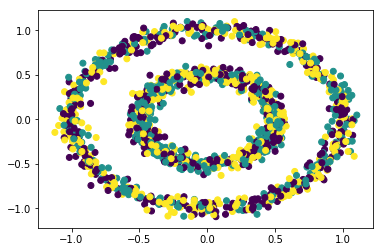

In [7]:
plt.scatter(A[:, 0], A[:, 1], c=y)

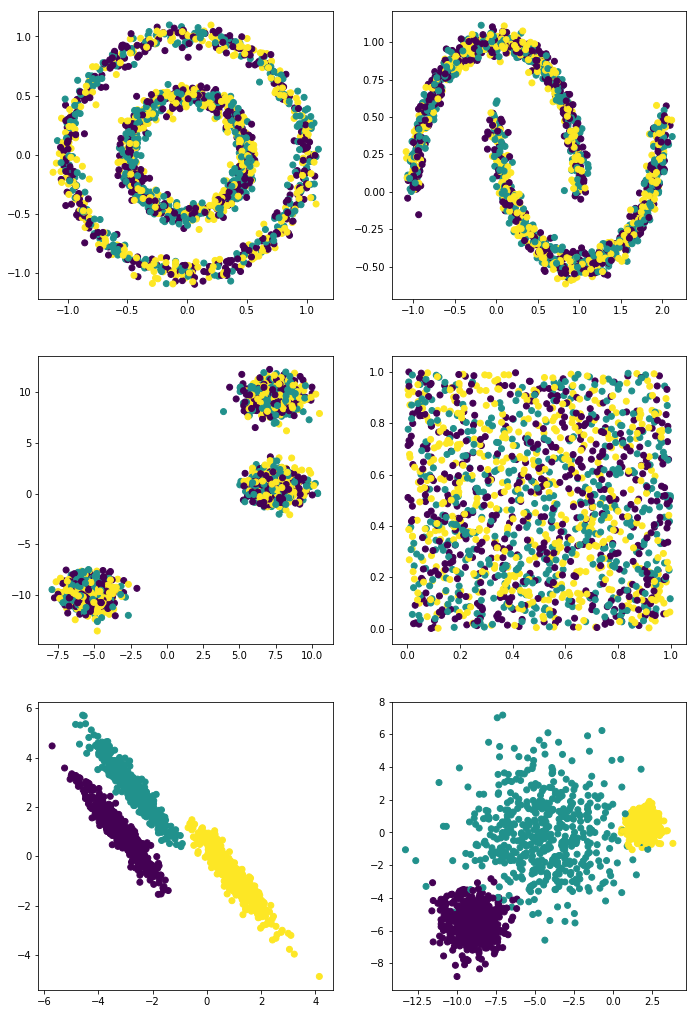

In [8]:
plt.figure(figsize=(10, 16))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.scatter(A[:, 0], A[:, 1], c=y)

plt.subplot(322)
plt.scatter(B[:, 0], B[:, 1], c=y)

plt.subplot(323)
plt.scatter(C[:, 0], C[:, 1], c=y)

plt.subplot(324)
plt.scatter(D[:, 0], D[:, 1], c=y)

plt.subplot(325)
plt.scatter(E[:, 0], E[:, 1], c=y)

plt.subplot(326)
plt.scatter(F[:, 0], F[:, 1], c=y)

# Ex.2: OrgSolution

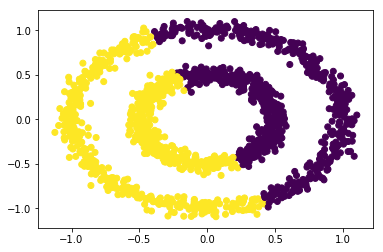

In [9]:
y_predA = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(A)
plt.scatter(A[:, 0], A[:, 1], c=y_predA)

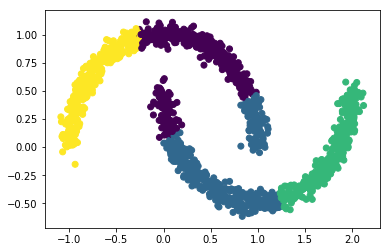

In [10]:
y_predB = cluster.KMeans(n_clusters=4, random_state=random_state).fit_predict(B)
plt.scatter(B[:, 0], B[:, 1], c=y_predB)

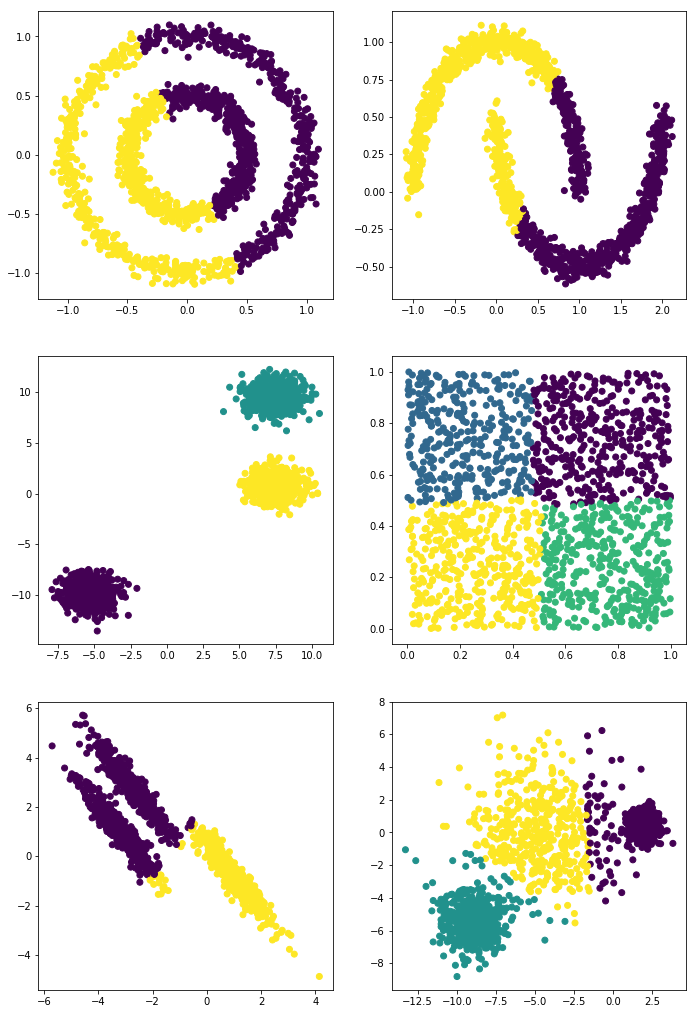

In [11]:
plt.figure(figsize=(10, 16))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
y_predA = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(A)
plt.scatter(A[:, 0], A[:, 1], c=y_predA)

plt.subplot(322)
y_predB = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(B)
plt.scatter(B[:, 0], B[:, 1], c=y_predB)

plt.subplot(323)
y_predC = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(C)
plt.scatter(C[:, 0], C[:, 1], c=y_predC)

plt.subplot(324)
y_predD = cluster.KMeans(n_clusters=4, random_state=random_state).fit_predict(D)
plt.scatter(D[:, 0], D[:, 1], c=y_predD)

plt.subplot(325)
y_predE = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(E)
plt.scatter(E[:, 0], E[:, 1], c=y_predE)

plt.subplot(326)
y_predF = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(F)
plt.scatter(F[:, 0], F[:, 1], c=y_predF)

# Ex.2: OrgSolution and Let's DBSCAN